In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
% autoreload 2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
import sys
sys.path.append('/users/amyskerry/documents/projects')
from pybq import bqdf
from pybq import credentialscfg as cfg

#Connect to a project

In [5]:
cfg.project_id

'durable-footing-95814'

In [10]:
#connect to project via project_id
con = bqdf.Connection(project_id=cfg.project_id, logging_file=cfg.log)

In [11]:
projects=con.list_all_projects()
print 
datasets=con.list_datasets(projects[0])
print 
tables=con.list_tables(projects[0], datasets[0])

Project list:
cragcrunch: durable-footing-95814
testing: silent-octagon-92616

Dataset list:
climbdb_bigquery

No tables found.


In [12]:
#specify bq paths to tables
#format: project:dataset.tablename (if dataset is in current project_id, can use just dataset.tablename)
table1 = 'fh-bigquery:reddit.subreddits' 
table2 = 'fh-bigquery:reddit.top20'

# Dataframe-ish abstraction for bigquery table

In [14]:
#create bqdf table connection
df1 = bqdf.BQDF(con, table1)
df2 = bqdf.BQDF(con, table2)

Waiting on bqjob_r729675d874620511_0000014e9c596e27_2 ... (0s) Current status: DONE   
Waiting on bqjob_r7868df2d013c07ed_0000014e9c597131_3 ... (0s) Current status: DONE   
0.000267028808594
Waiting on bqjob_r3b5c8e47a83e3383_0000014e9c5974e5_4 ... (0s) Current status: DONE   
Waiting on bqjob_r1b4391b0d8c21594_0000014e9c597c3c_5 ... (0s) Current status: DONE   
0.00869750976562


In [15]:
#these are not actually dataframes, but rather references to connected bigquery tables
#table referenced:
print df1.remote

fh-bigquery:reddit.subreddits


In [16]:
#connection object
print df1.con

<pybq.core.Connection instance at 0x115ad55a8>


In [17]:
#connected to project by bq api client
print df1.con.client

In [18]:
#a local copy or sample of the data is stored in df.local
#by default, local contains only a copy of the first 5 rows (the table's "head")
#but bqdf queries (incl built in joins, group bys, etc.) can also copy full result to df.local (if fetch=True)
df1.local

,subr,created_utc,score,num_comments,c_posts,ups,downs
0,Winnipeg,1271800307,35017,23782,1000,41170,6153
1,winterporn,1322432778,61256,1858,1000,66831,5575
2,wisconsin,1288755087,71500,24893,999,87718,16218
3,woahdude,1272095272,2089822,126829,1000,4970101,2880279
4,women,1221247390,63478,12128,1000,74948,11470


##Basic convenience operations

In [19]:
# standard df head
df1.head()

,subr,created_utc,score,num_comments,c_posts,ups,downs
0,Winnipeg,1271800307,35017,23782,1000,41170,6153
1,winterporn,1322432778,61256,1858,1000,66831,5575
2,wisconsin,1288755087,71500,24893,999,87718,16218
3,woahdude,1272095272,2089822,126829,1000,4970101,2880279
4,women,1221247390,63478,12128,1000,74948,11470


In [20]:
# columns of table
df1.columns

[u'subr',
 u'created_utc',
 u'score',
 u'num_comments',
 u'c_posts',
 u'ups',
 u'downs']

In [21]:
#return all values of a column
df1['created_utc'].values

Waiting on bqjob_r6abb61582c407cf6_0000014e9c59a3e1_6 ... (0s) Current status: DONE   
0.0142440795898


array([  1.27180031e+09,   1.32243278e+09,   1.28875509e+09, ...,
         1.23818118e+09,   1.33044594e+09,   1.26704815e+09])

In [22]:
#attr or dict like references
df1['score'].values

Waiting on bqjob_r7b9d570590c362a_0000014e9c59aa3a_7 ... (0s) Current status: DONE   
0.0217132568359


array([ 35017,  61256,  71500, ...,  76969, 135079,  37549])

In [93]:
# view schema details
schema=df1.table_schema

Waiting on bqjob_r1d3d2173a98591dc_0000014e9c08ba3c_206 ... (0s) Current status: DONE   
Table Schema for [fh-bigquery:reddit.subreddits]
subr (STRING) :   mode-NULLABLE
created_utc (TIMESTAMP) :   mode-NULLABLE
score (INTEGER) :   mode-NULLABLE
num_comments (INTEGER) :   mode-NULLABLE
c_posts (INTEGER) :   mode-NULLABLE
ups (INTEGER) :   mode-NULLABLE
downs (INTEGER) :   mode-NULLABLE


In [95]:
#shape of table
df1.size

Waiting on bqjob_r1b946529dd9fc9_0000014e9c08f88d_207 ... (0s) Current status: DONE   
Waiting on bqjob_r3ec258de5ffc7c07_0000014e9c08ffcc_208 ... (0s) Current status: DONE   
Waiting on bqjob_r54244a0b659606f9_0000014e9c0903b0_209 ... (0s) Current status: DONE   


(2499, 7)

In [96]:
#distinct elements in column
uniques=df1.unique('subr')
print uniques

Waiting on bqjob_r659124767065f6fb_0000014e9c090796_210 ... (0s) Current status: DONE   
Waiting on bqjob_r7008da8486dfd586_0000014e9c090b3f_211 ... (0s) Current status: DONE   
Waiting on bqjob_r35d7f8aa17bb7118_0000014e9c091266_212 ... (0s) Current status: DONE   
['Winnipeg' 'winterporn' 'wisconsin' ..., 'windowshots' 'windowsphone'
 'wine']


In [98]:
#columnar operations (min, max, mean, std, mode, unique, count) can be accessed in one of two ways
print df1.sum('score')
print df1['score'].sum()

Waiting on bqjob_r3d8620f15007aaa7_0000014e9c098d9e_213 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon7a770cc8f4e6740ce300ae6c7c44f1d203957a5a
returning head only
Waiting on bqjob_r1fea658bdee00d0a_0000014e9c0990cc_214 ... (0s) Current status: DONE   
Waiting on bqjob_r266d7505a483243d_0000014e9c099362_215 ... (0s) Current status: DONE   
388468674
fetching from local cache
Waiting on bqjob_r5a3e13bb0cade480_0000014e9c09972d_216 ... (0s) Current status: DONE   
fetching from local cache
388468674


In [74]:
# mean of column
df1.mean('score')

fetching from local cache
Waiting on bqjob_r6eeaf6aa6d7d46ce_0000014e9c077ab8_196 ... (0s) Current status: DONE   
fetching from local cache


155449.64945978392

In [99]:
#standard deviation of column
df1['score'].std()

Waiting on bqjob_r47b0ff3f5b7b0024_0000014e9c09ab6c_217 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon8a8471cbeaab4d38e1793ec71525e0c6a65a6bf2
returning head only
Waiting on bqjob_r7ba85b1e093ba229_0000014e9c09af1c_218 ... (0s) Current status: DONE   
Waiting on bqjob_r22eb762c553396f0_0000014e9c09b62f_219 ... (0s) Current status: DONE   


349534.8891608803

In [75]:
#mode of column (if multiple, returns first)
df1['num_comments'].mode()

Waiting on bqjob_r79c84b706b64b5b3_0000014e9c078d01_197 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anonefa0258d5a0763730f277c8d923270a45baaf2e5
returning head only
Waiting on bqjob_r486637ee8b784138_0000014e9c079005_198 ... (0s) Current status: DONE   
Waiting on bqjob_r347245902952efab_0000014e9c079384_199 ... (0s) Current status: DONE   


3

In [43]:
#max value in column
df1['num_comments'].max()

Waiting on bqjob_r894367d39b686ce_0000014e9bf8e729_30 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon95ee7e5b5fafebb5e597a3541b0640d971cc0d93
returning head only
Waiting on bqjob_r5822d7ffcf36ea2_0000014e9bf8ea9a_31 ... (0s) Current status: DONE   
Waiting on bqjob_r5ac6a7aff0ddae37_0000014e9bf8ef5a_32 ... (0s) Current status: DONE   


8082530

In [44]:
# non-null entries in column
df1['num_comments'].count()

Waiting on bqjob_r2e0004326eff4240_0000014e9bf8f701_33 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anonf3be05435c08f9ab0580fee5eed3e3b373194533
returning head only
Waiting on bqjob_r3f29018e7b35caf9_0000014e9bf8fb47_34 ... (0s) Current status: DONE   
Waiting on bqjob_r4214d1b8c9354e83_0000014e9bf902f0_35 ... (0s) Current status: DONE   


2499

In [102]:
df1.describe()

Waiting on bqjob_r3638accbff822e2e_0000014e9c09fcca_220 ... (0s) Current status: DONE   
Table Schema for [fh-bigquery:reddit.subreddits]
subr (STRING) :   mode-NULLABLE
created_utc (TIMESTAMP) :   mode-NULLABLE
score (INTEGER) :   mode-NULLABLE
num_comments (INTEGER) :   mode-NULLABLE
c_posts (INTEGER) :   mode-NULLABLE
ups (INTEGER) :   mode-NULLABLE
downs (INTEGER) :   mode-NULLABLE
Waiting on bqjob_r29b983edacd6b85e_0000014e9c0a005a_221 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon80907ad930966362cc5c56bb231d6045abb7fd5c
returning head only
Waiting on bqjob_r61608e74fe519eda_0000014e9c0a0464_222 ... (0s) Current status: DONE   
Waiting on bqjob_r37f1225c9b8f2205_0000014e9c0a0790_223 ... (0s) Current status: DONE   
Waiting on bqjob_r5342a6a17aea6320_0000014e9c0a0ad8_224 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon8782b793d03739e9bd81e37f9a0b

,c_posts,downs,num_comments,score,ups
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
min,1.000000,5.000000,0.000000,0.000000,2.000000
25th percentile,998.000000,3394.000000,5246.000000,17573.000000,20659.000000
50th percentile,1000.000000,7686.000000,13268.000000,41837.000000,50101.000000
75th percentile,1000.000000,20081.000000,27698.000000,116226.000000,133010.000000
max,1000.000000,26229952.000000,8082530.000000,3752388.000000,29943636.000000
mean,907.201681,146470.777911,38274.599840,155449.649460,301906.845538
std,218.490716,1113991.053720,191561.184023,349534.889161,1395142.130842
mode,1730.000000,3.000000,3.000000,2.000000,3.000000


## Joining and filtering

In [46]:
# df.where is used for filtering the table.
# each condition is expressed as it's own string argument
# only simple equality, greater than, less than are currently supported
print len(df1)
ndf = df1.where('num_comments>500000')
print len(ndf.local)
ndf = df1.where('num_comments>500000', 'score <2000000')
print len(ndf.local)

Waiting on bqjob_r61976833b7cb662_0000014e9bfb87ba_142 ... (0s) Current status: DONE   
Waiting on bqjob_rc38fd243c733d71_0000014e9bfb8a7f_143 ... (0s) Current status: DONE   
Waiting on bqjob_r1d21abb42829bd6a_0000014e9bfb9187_144 ... (0s) Current status: DONE   
2499
Waiting on bqjob_r3790a9dd31000fcf_0000014e9bfb94ef_145 ... (0s) Current status: DONE   
Waiting on bqjob_r410ac9b5d73cdf3a_0000014e9bfb9c4d_146 ... (0s) Current status: DONE   
Waiting on bqjob_re236457da2448d6_0000014e9bfb9f2c_147 ... (0s) Current status: DONE   
21
Waiting on bqjob_r30ce2d0578cda824_0000014e9bfba6f3_148 ... (0s) Current status: DONE   
Waiting on bqjob_r243ede896fed1ab8_0000014e9bfbaeef_149 ... (0s) Current status: DONE   
Waiting on bqjob_r6dd12035ca3ec4dd_0000014e9bfbb70f_150 ... (0s) Current status: DONE   
6


In [106]:
#join two tables
#note this returns a new BQDF object with a reference to the resulting table
ndf=df1.join(df2, on='subr', how='inner')

fetching from local cache
Waiting on bqjob_r35b2fe3937ba5d6c_0000014e9c0e362d_327 ... (0s) Current status: DONE   
fetching from local cache


In [48]:
#references temporary table created by query
ndf.remote

u'[durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon28b5b8b485f49cb4a4e98c0050fc19ad20099d86]'

In [49]:
#because fetch defaults to True, remote table was fetched to ndf.local
ndf.local

,df1_subr,df1_created_utc,df1_score,df1_num_comments,df1_c_posts,df1_ups,df1_downs,df2_subr,df2_sum_score
0,worldnews,1245520828,2876818,1520393,1000,12232641,9355823,worldnews,2876818
1,WTF,1222835012,2665757,1138484,1000,15478789,12813032,WTF,2665757
2,funny,1221430088,3713684,838031,1000,29943636,26229952,funny,3713684
3,gaming,1253397497,2633408,976844,1000,16049758,13416350,gaming,2633408
4,gifs,1308299210,2615749,267366,1000,11088214,8472465,gifs,2615749
5,mildlyinteresting,1339002701,2487454,220753,1000,7632646,5145192,mildlyinteresting,2487454
6,cringepics,1353378477,2320307,310899,999,4956013,2635706,cringepics,2320307
7,pics,1232129032,3752388,1119747,1000,28512455,24760067,pics,3752388
8,politics,1213054866,3157350,1529645,999,12994846,9837496,politics,3157350
9,reactiongifs,1329098282,2320331,127718,1000,5915530,3595199,reactiongifs,2320331


## More flexible querying

In [107]:
#execute arbitrary sql commands and return as df and source
#note: raw_query does not return a BQDF object
querystr = """
SELECT subr, num_comments, score, c_posts FROM %s  LIMIT 1000
""" %table1
df, source = bqdf.raw_query(con, querystr)

Waiting on bqjob_r32bde585b7276dcb_0000014e9c0e7d6c_328 ... (0s) Current status: DONE   


In [53]:
df.head()

,subr,num_comments,score,c_posts
0,Winnipeg,23782,35017,1000
1,winterporn,1858,61256,1000
2,wisconsin,24893,71500,999
3,woahdude,126829,2089822,1000
4,women,12128,63478,1000


In [54]:
tablename=util.stringify(source)
print tablename

durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anona2dafbb18ce408e7080759002199b8e1936d5c0b


In [109]:
#raw_query returns just a dataframe and a source reference, but we can make a BQDF instance pointing to the source
tdf = bqdf.BQDF(con, '%s' %tablename)

Waiting on bqjob_r25c841a6b9079f25_0000014e9c0f93a4_329 ... (0s) Current status: DONE   
Waiting on bqjob_r40f9ac289dfbfdc2_0000014e9c0f9b99_330 ... (0s) Current status: DONE   
0.408462524414


In [110]:
tdf.columns

[u'subr', u'num_comments', u'score', u'c_posts']

##Plotting

fetching from local cache
Waiting on bqjob_r76a08ee6ec89d489_0000014e9c0fcbb4_331 ... (0s) Current status: DONE   
fetching from local cache
fetching from local cache
Waiting on bqjob_r1426ca2c02b7ae77_0000014e9c0fcead_332 ... (0s) Current status: DONE   
fetching from local cache
Waiting on bqjob_r33769476d549f7fd_0000014e9c0fd249_333 ... (0s) Current status: DONE   
0.414665222168
Waiting on bqjob_r4579156b2985b25_0000014e9c0fd86c_334 ... (0s) Current status: DONE   
Waiting on bqjob_r30812ce6a64bed6_0000014e9c0fdff9_335 ... (0s) Current status: DONE   
0.479141235352


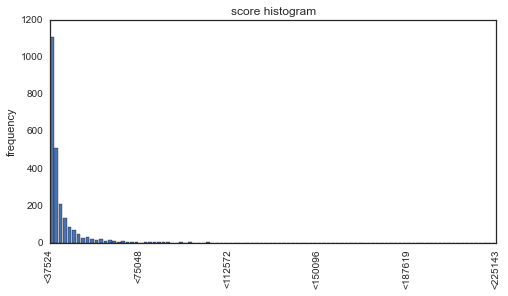

In [111]:
#create a histogram of a column's values
histdf=df1['score'].hist(bins=100)

Waiting on bqjob_r5184417b804558ef_0000014e9c101819_336 ... (0s) Current status: DONE   
0.492477416992
Waiting on bqjob_r355d92d17df024e4_0000014e9c101bfd_337 ... (0s) Current status: DONE   
Waiting on bqjob_r68422f0de06796f0_0000014e9c101f8d_338 ... (0s) Current status: DONE   
0.498565673828


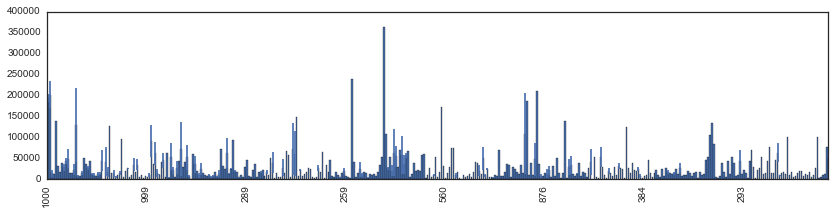

In [112]:
#create a simple plot (mean +/- 1 SEM) of value_col, broken down by grouping_col
value_col='score'
grouping_col='c_posts'
df1.plot(grouping_col, value_col, kind='bar')

In [113]:
con.update()

Waiting on bqjob_r5446ea84859d2408_0000014e9c108526_339 ... (0s) Current status: DONE   
0.000267028808594
Waiting on bqjob_r254a7a18c87ae0a3_0000014e9c108822_340 ... (0s) Current status: DONE   
Waiting on bqjob_r13cbc6b92c94b718_0000014e9c108b40_341 ... (0s) Current status: DONE   
0.00558471679688
Waiting on bqjob_r470bd9571cb96a81_0000014e9c109321_342 ... (0s) Current status: DONE   
0.0102310180664
Waiting on bqjob_r70edbaee454db3dc_0000014e9c1099ca_343 ... (0s) Current status: DONE   
Waiting on bqjob_r68e0ea3c6440532a_0000014e9c10a133_344 ... (0s) Current status: DONE   
0.0151901245117


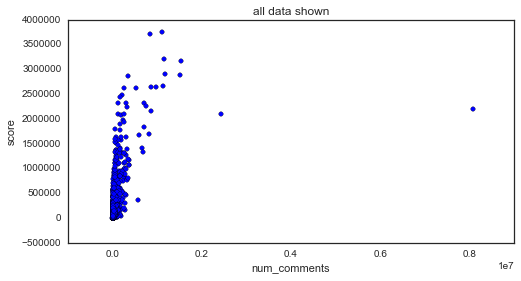

In [114]:
#create scatter plot of x vs. y (since bins > total number of datapoints, will plot all data)
scatterseries=df1.scatter('num_comments', 'score', bins=5000)

Waiting on bqjob_r57465fd7070b45b_0000014e9bfcca94_175 ... (0s) Current status: DONE   
Waiting on bqjob_r5c068c203eb4093c_0000014e9bfccd5a_176 ... (0s) Current status: DONE   
Waiting on bqjob_r8ffe5f69ef98ff9_0000014e9bfcd244_177 ... (0s) Current status: DONE   
Waiting on bqjob_r449e1df5c4378473_0000014e9bfcd989_178 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon95ee7e5b5fafebb5e597a3541b0640d971cc0d93
returning head only
Waiting on bqjob_r185516469de6755b_0000014e9bfcdcb6_179 ... (0s) Current status: DONE   
Waiting on bqjob_r143c60795e77f250_0000014e9bfce3e6_180 ... (0s) Current status: DONE   
Waiting on bqjob_r2fa60537e947ca0c_0000014e9bfceb68_181 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon58daa3ca68c9e2778f67288fe354a2d0260271f1
returning head only
Waiting on bqjob_r63168006009c68a8_0000014e9bfcedcc_182 ... (0s) Current status: DONE   
Wa

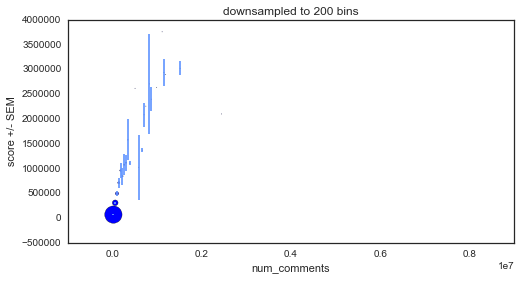

In [60]:
#create a downsampled scatter plot of x vs. y
plotdf=df1.scatter('num_comments', 'score', bins=200)

##Misc/ToDo

- get costs stats?
- groupby.apply functionality where apply logic is run locally in python (but only has to pull down one group at a time)
- compare to dask